In [28]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### From the above, we can see that, 'sqft_above' is missing 2 data points. All the other columns are complete and have no missing data. Let's start by converting only waterfront,view and the condition variables for now

In [4]:
#creating a new df with the predictor variables. 'price' is what we're looking to predict.
categories = ['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','zipcode','price',
              'yr_renovated','sqft_above','sqft_basement']
data = df[categories]
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,price,yr_renovated,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,0,0,3,98178,221900.0,0,1180.0,0
1,3,2.25,2570,7242,2.0,0,0,3,98125,538000.0,1991,2170.0,400
2,2,1.00,770,10000,1.0,0,0,3,98028,180000.0,0,770.0,0
3,4,3.00,1960,5000,1.0,0,0,5,98136,604000.0,0,1050.0,910
4,3,2.00,1680,8080,1.0,0,0,3,98074,510000.0,0,1680.0,0


##### Identifying categorical variables

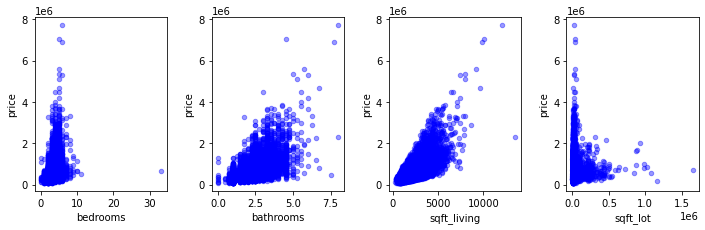

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['bedrooms', 'bathrooms','sqft_living','sqft_lot'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

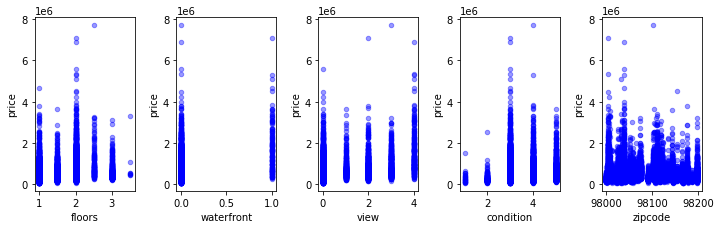

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['floors','waterfront','view','condition','zipcode'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

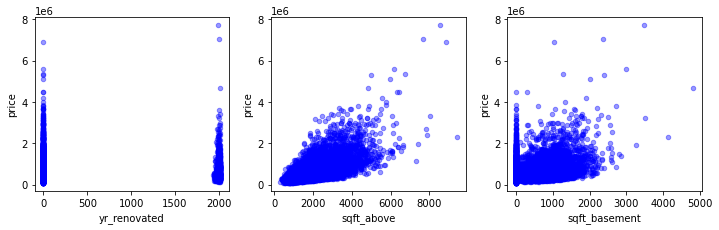

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['yr_renovated','sqft_above','sqft_basement'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

#### From the plots, it is clear that floors, waterfront,view, zipcode and condition are categorical variables

#### Let's start with only the waterfront, view and condition variables

In [8]:
# examining each variable
data['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [9]:
data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [10]:
data['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [11]:
data['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [12]:
data['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

#### Since waterfront has only 2 categories, we can use OrdinalEncoder to generate binary values

In [13]:
from sklearn.preprocessing import OrdinalEncoder

waterfront = data[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront)
waterfront_encoded = encoder_waterfront.transform(waterfront)
waterfront_encoded

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [14]:
# Replacing the original waterfront values with the encoded values
data['waterfront'] = waterfront_encoded

In [26]:
# renaming the waterfront column
data.rename(columns = {'waterfront':'waterfront_encoded'},inplace = True)

#### Since floors, view and condition have multiple categories, we can use OneHotEncoder.Each category will be transformed into a new column and assigned binary values. We will then convert them to a df and add them to the original df to make it easier to read and create our model

In [16]:
# transforming 'view'

from sklearn.preprocessing import OneHotEncoder

view = data[['view']]
view_encoder = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
view_encoder.fit(view)
view_encoded = view_encoder.transform(view)
view_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [17]:
#converting to a df
view_encoded_df = pd.DataFrame(view_encoded, index = data.index)
view_encoded_df

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21608,1.0,0.0,0.0,0.0,0.0
21609,1.0,0.0,0.0,0.0,0.0
21610,1.0,0.0,0.0,0.0,0.0
21611,1.0,0.0,0.0,0.0,0.0


In [18]:
# creating new names for the columns
old_names = view_encoded_df.columns
new_names = ['view_0', 'view_1', 'view_2', 'view_3', 'view_4']
names = dict(zip(old_names, new_names))

In [19]:
# renaming the columns so better readability
view_encoded_df.rename(columns=names,inplace=True)
view_encoded_df

,view_0,view_1,view_2,view_3,view_4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21608,1.0,0.0,0.0,0.0,0.0
21609,1.0,0.0,0.0,0.0,0.0
21610,1.0,0.0,0.0,0.0,0.0
21611,1.0,0.0,0.0,0.0,0.0


In [20]:
# appending the view_encoded_df to the datadf
data.drop('view',axis=1,inplace=True)
data = pd.concat([data,view_encoded_df],axis=1)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,zipcode,price,yr_renovated,sqft_above,sqft_basement,view_0,view_1,view_2,view_3,view_4
0,3,1.00,1180,5650,1.0,0.0,3,98178,221900.0,0,1180.0,0,1.0,0.0,0.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0.0,3,98125,538000.0,1991,2170.0,400,1.0,0.0,0.0,0.0,0.0
2,2,1.00,770,10000,1.0,0.0,3,98028,180000.0,0,770.0,0,1.0,0.0,0.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0.0,5,98136,604000.0,0,1050.0,910,1.0,0.0,0.0,0.0,0.0
4,3,2.00,1680,8080,1.0,0.0,3,98074,510000.0,0,1680.0,0,1.0,0.0,0.0,0.0,0.0


In [21]:
# transforming 'condition'using OneHotEncoder
condition = data[['condition']]
condition_encoder = OneHotEncoder(categories='auto',sparse=False,handle_unknown='ignore')
condition_encoder.fit(condition)
condition_encoded = condition_encoder.transform(condition)
condition_encoded

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [22]:
#converting the encoded values into a df
condition_encoded_df = pd.DataFrame(condition_encoded,index=data.index)
condition_encoded_df.head()

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0


In [23]:
#renaming the columns
old_names= condition_encoded_df.columns
new_names = ['condition_0','condition_1','condition_2','condition_3','condition_4']
names = dict(zip(old_names,new_names))

condition_encoded_df.rename(columns=names,inplace=True)
condition_encoded_df

,condition_0,condition_1,condition_2,condition_3,condition_4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
21608,0.0,0.0,1.0,0.0,0.0
21609,0.0,0.0,1.0,0.0,0.0
21610,0.0,0.0,1.0,0.0,0.0
21611,0.0,0.0,1.0,0.0,0.0


In [24]:
#adding to the original data df
data.drop('condition',axis=1,inplace=True)
data = pd.concat([data,condition_encoded_df],axis=1)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,zipcode,price,yr_renovated,sqft_above,...,view_0,view_1,view_2,view_3,view_4,condition_0,condition_1,condition_2,condition_3,condition_4
0,3,1.00,1180,5650,1.0,0.0,98178,221900.0,0,1180.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0.0,98125,538000.0,1991,2170.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.00,770,10000,1.0,0.0,98028,180000.0,0,770.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0.0,98136,604000.0,0,1050.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,2.00,1680,8080,1.0,0.0,98074,510000.0,0,1680.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            21613 non-null  int64  
 1   bathrooms           21613 non-null  float64
 2   sqft_living         21613 non-null  int64  
 3   sqft_lot            21613 non-null  int64  
 4   floors              21613 non-null  float64
 5   waterfront_encoded  21613 non-null  float64
 6   zipcode             21613 non-null  int64  
 7   price               21613 non-null  float64
 8   yr_renovated        21613 non-null  int64  
 9   sqft_above          21611 non-null  float64
 10  sqft_basement       21613 non-null  int64  
 11  view_0              21613 non-null  float64
 12  view_1              21613 non-null  float64
 13  view_2              21613 non-null  float64
 14  view_3              21613 non-null  float64
 15  view_4              21613 non-null  float64
 16  cond

In [38]:
# sqft_above has missing values
data['sqft_above'].isna().value_counts()

False    21611
True         2
Name: sqft_above, dtype: int64

In [37]:
data['sqft_above'].describe()

count    21611.000000
mean      1788.396095
std        828.128162
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [42]:
#imputing the median value
median = data['sqft_above'].median()
data['sqft_above'].fillna(median,inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            21613 non-null  int64  
 1   bathrooms           21613 non-null  float64
 2   sqft_living         21613 non-null  int64  
 3   sqft_lot            21613 non-null  int64  
 4   floors              21613 non-null  float64
 5   waterfront_encoded  21613 non-null  float64
 6   zipcode             21613 non-null  int64  
 7   yr_renovated        21613 non-null  int64  
 8   sqft_above          21613 non-null  float64
 9   sqft_basement       21613 non-null  int64  
 10  view_0              21613 non-null  float64
 11  view_1              21613 non-null  float64
 12  view_2              21613 non-null  float64
 13  view_3              21613 non-null  float64
 14  view_4              21613 non-null  float64
 15  condition_0         21613 non-null  float64
 16  cond

In [44]:
#creating X and y for modelling
y=df['price']
X=data

In [52]:
# creating train and test splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50)

In [58]:
# checking the shape of the datasets
print(f'shape of X_train is {X_train.shape}')
print(f'shape of y_train is {y_train.shape}')
print(f'shape of X_test is {X_test.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of X_train is (16209, 20)
shape of y_train is (16209,)
shape of X_test is (5404, 20)
shape of y_test is (5404,)


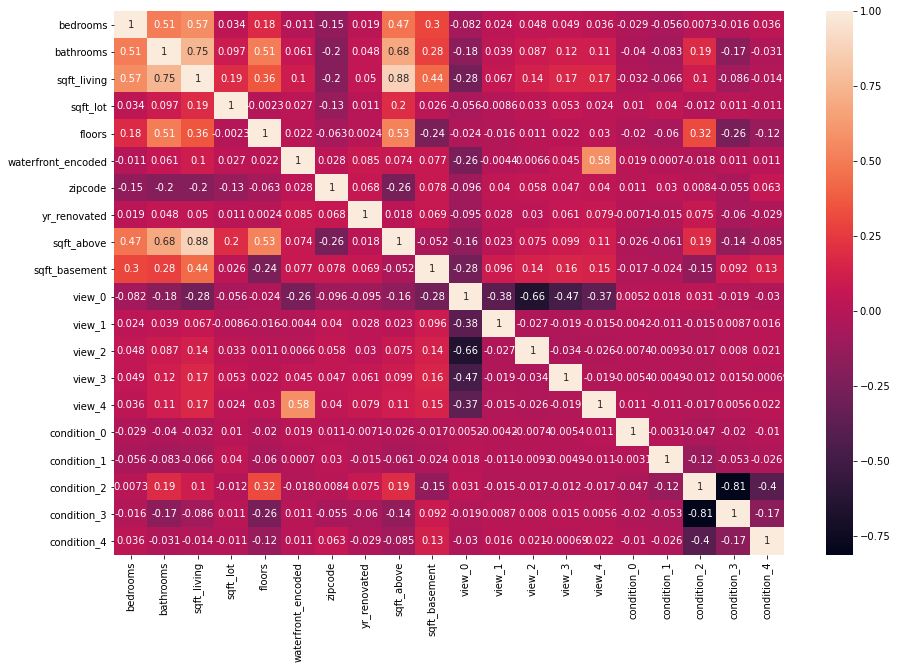

In [57]:
# visualizing co-realtion values
fig,ax = plt.subplots(figsize=(15,10))

corr = X_train.corr()
sns.heatmap(corr,annot=True,ax=ax);

### From the heatmap, it is apparent that having encoded values makes no sense since the values are mostly 0 and even negative.This will have an adverse impact on the model and so it's best to revert to the orginal dataset for the modelling.

In [65]:
X = df
X.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045


In [67]:
# dropping irrelevant columns
X.drop(['id','date','sqft_living15','sqft_lot15'],axis=1,inplace=True)
X.drop(['lat','long'],axis=1,inplace=True)
X.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074
